In [49]:
import cv2, os, sys
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

### 1

In [4]:
img_path = 'C:\\Users\\Okita\\Downloads\\robotics , AI\\python\\kadai_9\\dog193.jpg'
dog_bgr = cv2.imread(img_path)
dog_hls = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2HLS)
dog_hsv = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2HSV)
dog_lab = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2LAB)
dog_yuv = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2YUV)
dog_ycrcb = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2YCrCb)

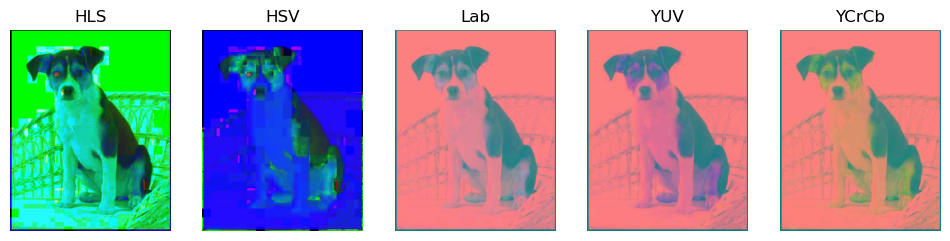

In [11]:
def fig_img(num,img,title):
    ax_num = fig.add_subplot(1,5,num)
    ax_num.imshow(img)
    ax_num.set_title(title)
    ax_num.axis('off')
    
    
img_list = [dog_hls, dog_hsv, dog_lab, dog_yuv, dog_ycrcb]
title_list = ['HLS', 'HSV', 'Lab', 'YUV', 'YCrCb']
fig = plt.figure(figsize=(12,6))
fig.set_facecolor('white')
for i in range(len(img_list)):
    fig_img(i+1,img_list[i],title_list[i])
    
plt.show()

### 2

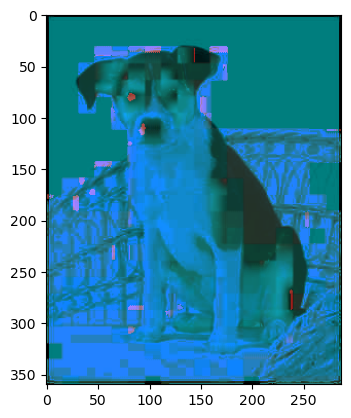

In [13]:
img_blend = cv2.addWeighted(dog_hsv, 0.5, dog_hls, 0.5, gamma=0)
plt.imshow(img_blend)

### 3

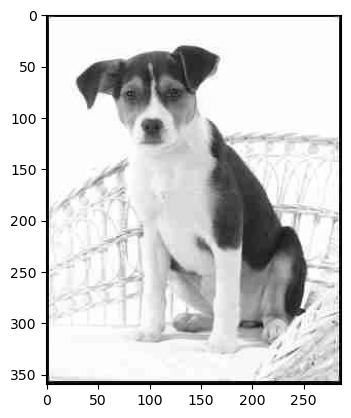

In [17]:
dog_gray = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(dog_gray,cmap='gray')

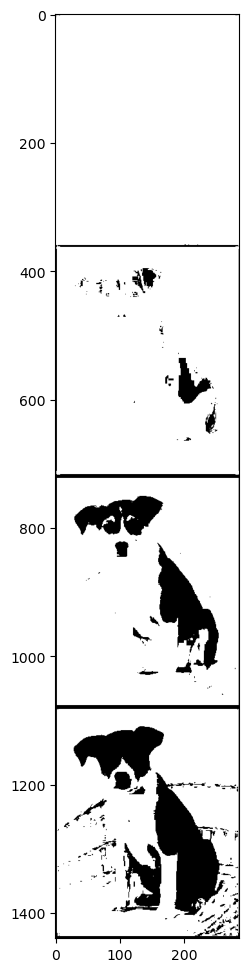

In [20]:
dog_bin = []
thresh_list = [0,50,128,200]    
for i in range(len(thresh_list)):
    ret, dog_thresh_i = cv2.threshold(dog_gray, thresh_list[i], 255, cv2.THRESH_BINARY)
    dog_bin.append(dog_thresh_i)


dog_concat = cv2.vconcat([dog_bin[0], dog_bin[1],
                          dog_bin[2], dog_bin[3]])
plt.figure(figsize=(6,12))
plt.imshow(dog_concat, cmap='gray')

### 4

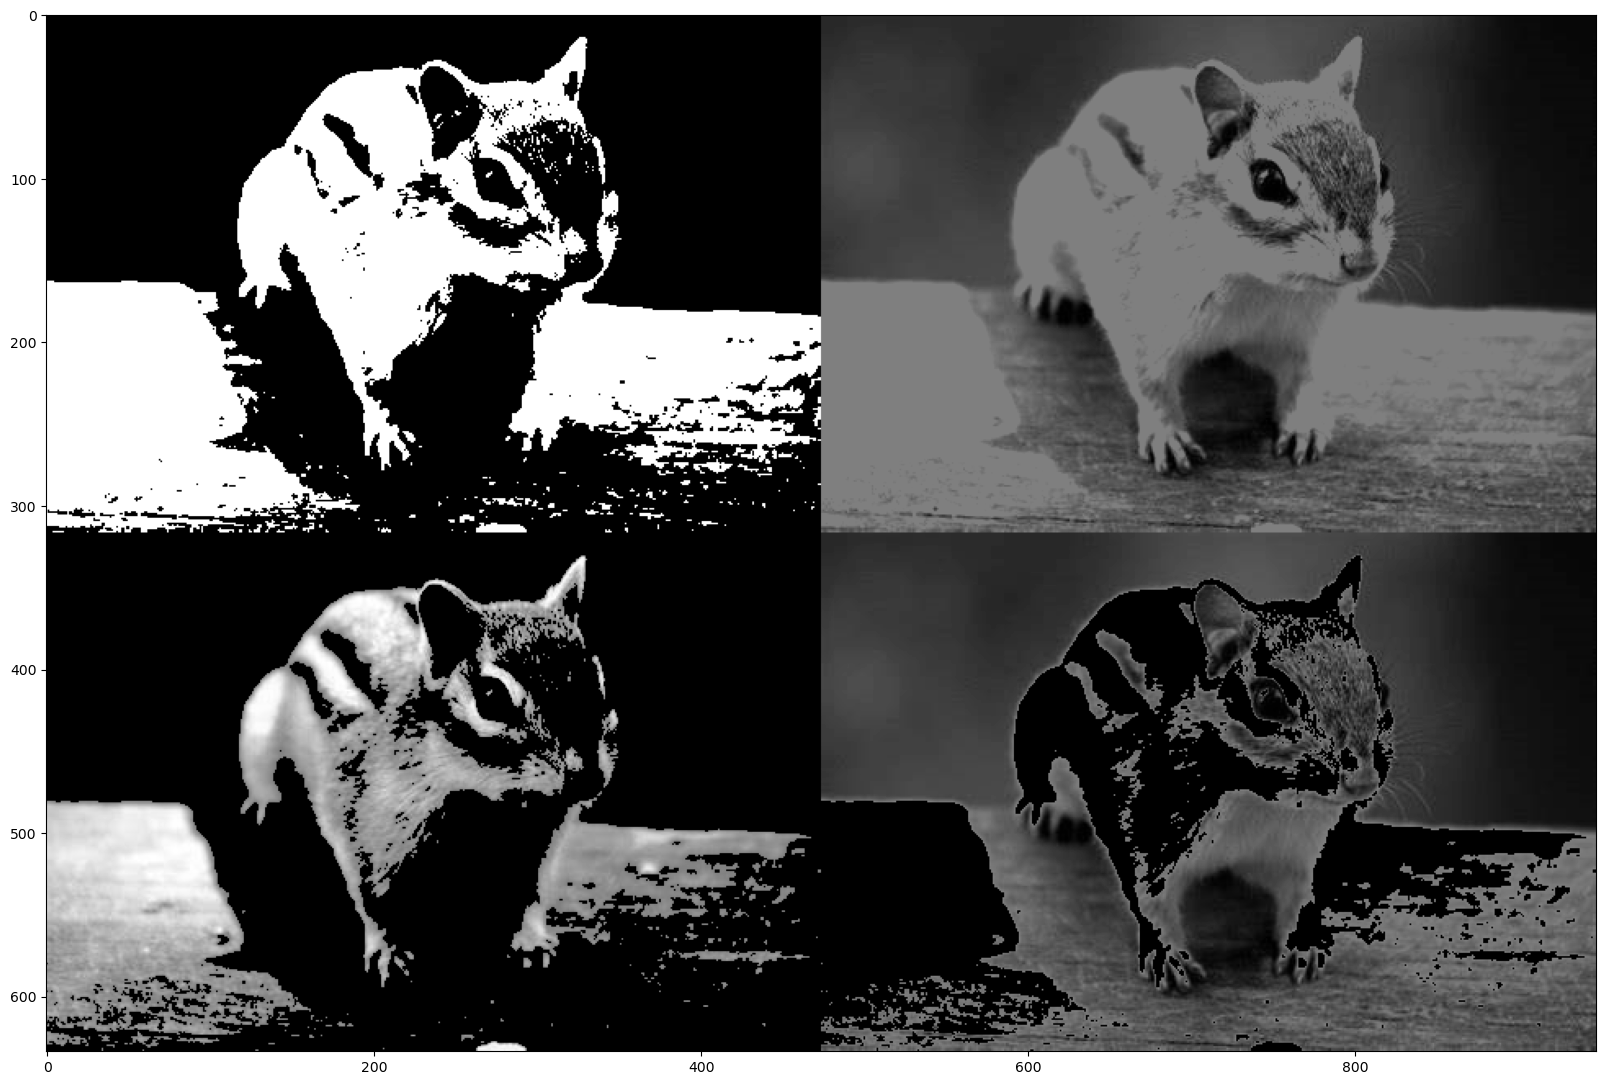

In [51]:
img_path = "C:\\img\\squirre.jpg"
squirre_bgr = cv2.imread(img_path)
squirre_gray = cv2.cvtColor(squirre_bgr, cv2.COLOR_BGR2GRAY)

ret, squirre_otsu       = cv2.threshold(squirre_gray, 127, 255, cv2.THRESH_OTSU)
ret, squirre_trunc      = cv2.threshold(squirre_gray, 127, 255, cv2.THRESH_TRUNC)
ret, squirre_tozero     = cv2.threshold(squirre_gray, 127, 255, cv2.THRESH_TOZERO)
ret, squirre_tozero_inv = cv2.threshold(squirre_gray, 127, 255, cv2.THRESH_TOZERO_INV)

squirre_concat1 = cv2.hconcat([squirre_otsu, squirre_trunc])
squirre_concat2 = cv2.hconcat([squirre_tozero, squirre_tozero_inv])
squirre_concat  = cv2.vconcat([squirre_concat1,squirre_concat2])
plt.figure(figsize=(20,20))
plt.imshow(squirre_concat, cmap='gray')

### 5

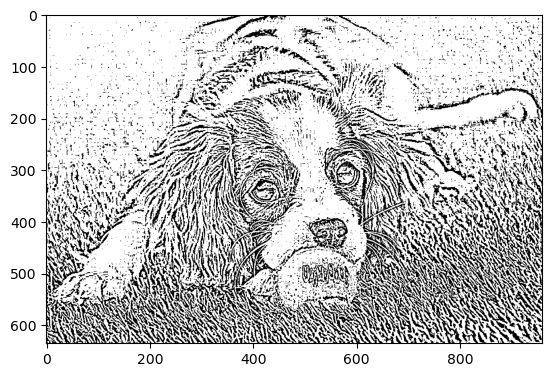

In [30]:
img_path = "C:\\img\\dog.jpg"
dog_bgr = cv2.imread(img_path)
dog_gray = cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2GRAY)

dog_gaussian = cv2.adaptiveThreshold(dog_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
plt.imshow(dog_gaussian, 'gray')

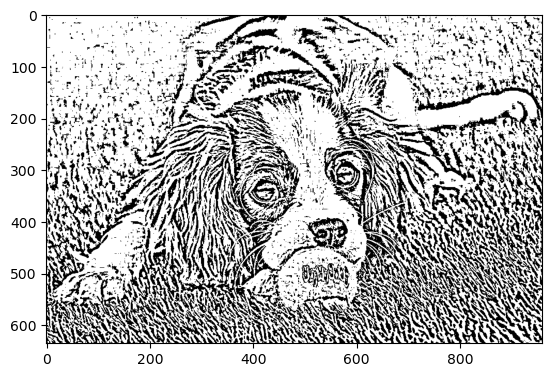

In [32]:
dog_mean = cv2.adaptiveThreshold(dog_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
plt.imshow(dog_mean,'gray')

### 6

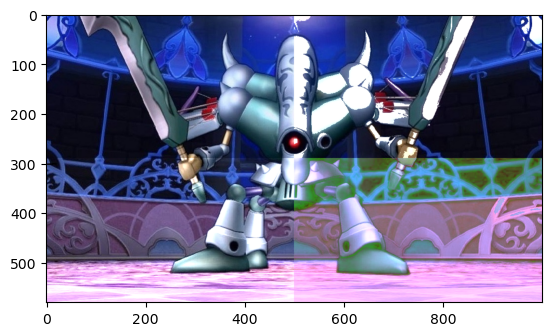

In [128]:
img_path = "C:\\img\\monster.jpg"
monster_bgr = cv2.imread(img_path)
# BGR --> RGB
monster_rgb  = cv2.cvtColor(monster_bgr, cv2.COLOR_BGR2RGB)
monster_hsv  = cv2.cvtColor(monster_bgr, cv2.COLOR_BGR2HSV)
monster_gray = cv2.cvtColor(monster_bgr, cv2.COLOR_BGR2GRAY)
ret, monster_thresh = cv2.threshold(monster_gray, 127, 255, cv2.THRESH_BINARY)

base = np.zeros((580,1000,3), np.uint8)
# HSV画像を足す
base[base.shape[0]//2:,base.shape[1]//2:] = monster_hsv[base.shape[0]//2:,base.shape[1]//2:]

# ループ処理で1チャンネルずつ足していく
for i in range(base.shape[2]):
    base[base.shape[0]//2:,:base.shape[1]//2,i] = monster_gray[base.shape[0]//2:,:base.shape[1]//2]
    base[:base.shape[0]//2,base.shape[1]//2:,i] = monster_thresh[:base.shape[0]//2,base.shape[1]//2:]

# RGB画像とブレンド
monster_blend = cv2.addWeighted(monster_rgb, 1.0, base, 0.5, gamma=0)
plt.imshow(monster_blend)